# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#loading dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
425,LP002366,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural,Y


Data Descriptive Analysis

In [7]:
#checking the data shape
df.shape

(614, 13)

In [8]:
#checking for nature of datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#Checking data description for all numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
#Checking data description for all non-numerical columns
df_categorical=df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed']]
df_categorical.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed
count,614,601,611,599,614,582
unique,614,2,2,4,2,2
top,LP001002,Male,Yes,0,Graduate,No
freq,1,489,398,345,480,500


In [13]:
# checking the columns of the main dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#checking for null values whcih we saw in information
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#Checking for null values
df.isnull().sum().sum()

149

There are a total of 149 null values in the dataset

In [22]:
from collections import Counter

In [23]:
#Checking the content of each Categorical columns
print("The Value Counts in Loan_ID - ",Counter(df['Loan_ID']))
print("The Value Counts in Gender - ",Counter(df['Gender']))
print("The Value Counts in Married   - ",Counter(df['Married']))
print("The Value Counts in Dependents - ",Counter(df['Dependents']))
print("The Value Counts in Education  - ",Counter(df['Education']))
print("The Value Counts in Self_Employed - ",Counter(df['Self_Employed']))
print("The Value Counts in Property_Area - ",Counter(df['Property_Area']))
print("The Value Counts in Loan_Status- ",Counter(df['Loan_Status']))

The Value Counts in Loan_ID -  Counter({'LP001002': 1, 'LP001003': 1, 'LP001005': 1, 'LP001006': 1, 'LP001008': 1, 'LP001011': 1, 'LP001013': 1, 'LP001014': 1, 'LP001018': 1, 'LP001020': 1, 'LP001024': 1, 'LP001027': 1, 'LP001028': 1, 'LP001029': 1, 'LP001030': 1, 'LP001032': 1, 'LP001034': 1, 'LP001036': 1, 'LP001038': 1, 'LP001041': 1, 'LP001043': 1, 'LP001046': 1, 'LP001047': 1, 'LP001050': 1, 'LP001052': 1, 'LP001066': 1, 'LP001068': 1, 'LP001073': 1, 'LP001086': 1, 'LP001087': 1, 'LP001091': 1, 'LP001095': 1, 'LP001097': 1, 'LP001098': 1, 'LP001100': 1, 'LP001106': 1, 'LP001109': 1, 'LP001112': 1, 'LP001114': 1, 'LP001116': 1, 'LP001119': 1, 'LP001120': 1, 'LP001123': 1, 'LP001131': 1, 'LP001136': 1, 'LP001137': 1, 'LP001138': 1, 'LP001144': 1, 'LP001146': 1, 'LP001151': 1, 'LP001155': 1, 'LP001157': 1, 'LP001164': 1, 'LP001179': 1, 'LP001186': 1, 'LP001194': 1, 'LP001195': 1, 'LP001197': 1, 'LP001198': 1, 'LP001199': 1, 'LP001205': 1, 'LP001206': 1, 'LP001207': 1, 'LP001213': 1, 

In [24]:
#Checking the content of each Categorical columns
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [28]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [29]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [30]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [32]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [34]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Observations:

   - The Dataset is made up of;
   - 614 rows and 13 columns
   - 12 features and 1 Target
   
   
Description of Features:

     Loan_ID  :
    - It is made up of Categorical data
    - It has no null values
    - Its Datatype is an Object type
    
     Gender  :
    - It is made up of Categorical data
    - It has null values
    - There are 2 factors-males & females in the dataset.
    - Its Datatype is an Object type
    
     Married  :
    - It is made up of Categorical data
    - It has null values
    - There are 2 factors - married and not married.
    - Its Datatype is an Object type
    
    Dependents  :
    - It is made up of Categorical data
    - It has null values
    - There are 4 factors - 0,1,2,3+
    - Its Datatype is an Object type
    
    Education   :
    - It is made up of Categorical data
    - It has null values
    - There are 2 factors - Graduate & Non Graduate
    - Its Datatype is an Object type
    
    Self_Employed
    - It is made up of Categorical data
    - It has null values
    - There are 2 factors - Yes & No.
    - Its Datatype is an Object type
    
    Property_Area
    - It is made up of Categorical data
    - It has null values
    - There are 3 factors - Semiurban, Urban & Rural 
    - Its Datatype is an Object type
    
    Loan_Status
    - It is made up of Categorical data
    - It has null values
    - There are 2 factors - Y & N.
    - Its Datatype is an Object type
    
    

In [35]:
df.shape

(614, 13)

EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

Count Distribution of Categorical Data - Univariate Analysis

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


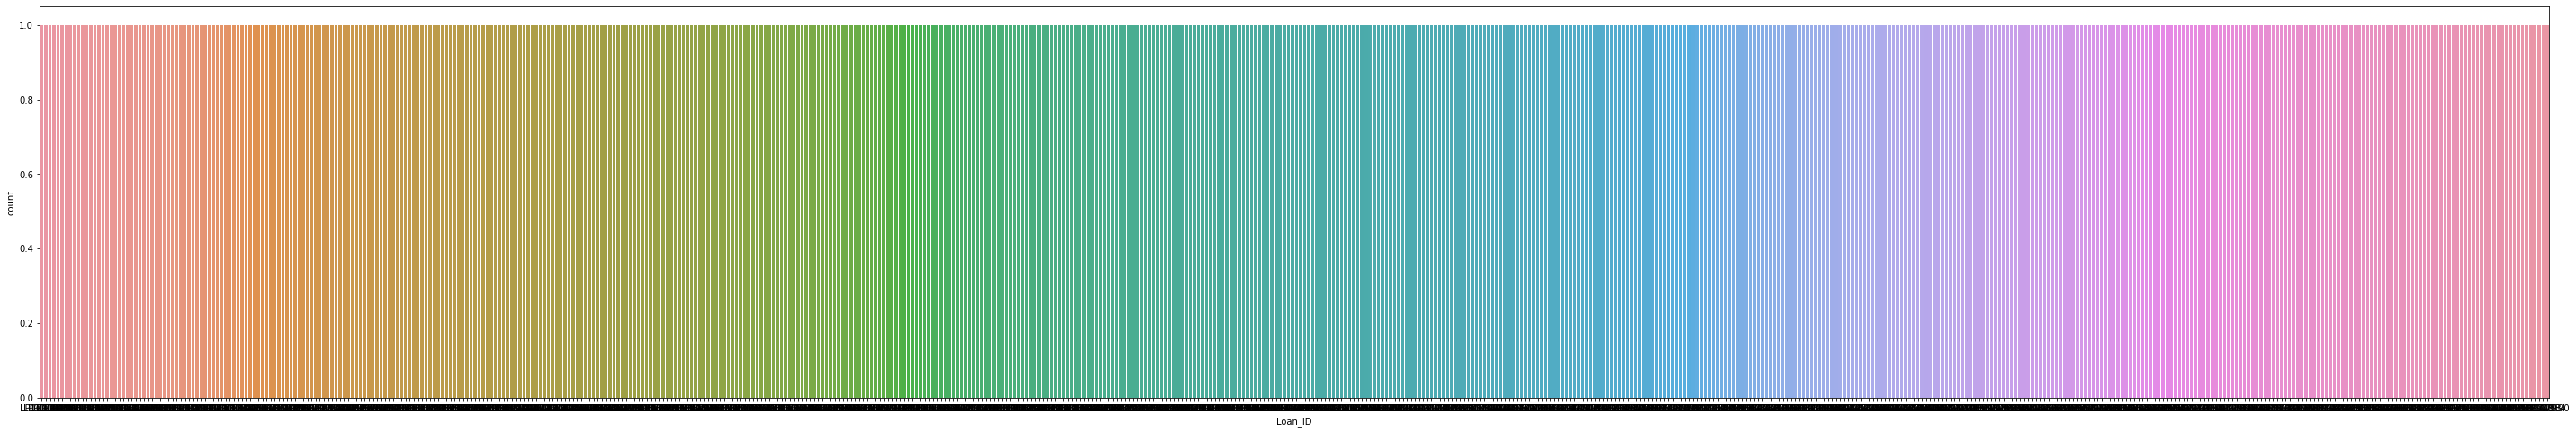

In [38]:
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Loan_ID',data=df)
print(df['Loan_ID'].value_counts())

Observation:The Loan ID have a lot of factors(614) which has affected the visibility of its plot

Male      489
Female    112
Name: Gender, dtype: int64


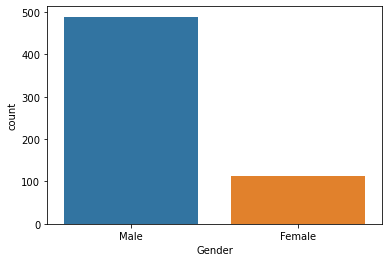

In [39]:
#Gender
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Observation:
    There are more males than females who have applied for loan.

Yes    398
No     213
Name: Married, dtype: int64


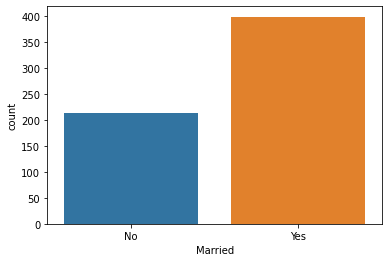

In [40]:
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

Observation: More married people have applied for the loan.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


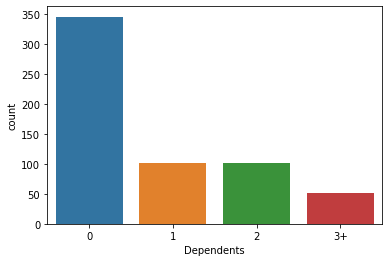

In [41]:
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Observation:
    Most of the applicants have no dependents.Followed by applicants who have 1 or 2 dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


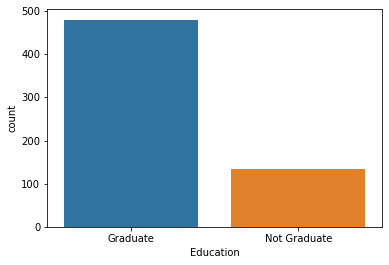

In [46]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

Observation: Most of the applicants are graduates.

No     500
Yes     82
Name: Self_Employed, dtype: int64


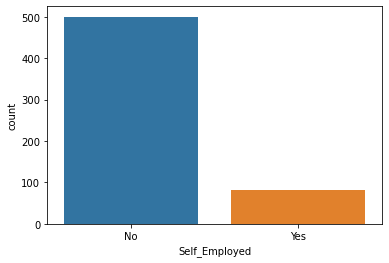

In [47]:
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

Observation: Most of teh applicants are not self employed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


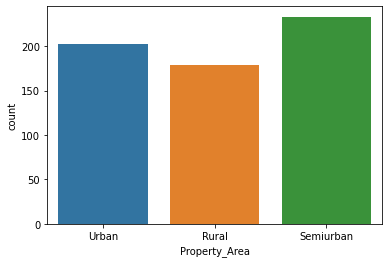

In [48]:
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

Observation: Most of the applicants are from SemiUrban areas, followed by Urban & Rural.

In [27]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Updating Null values

<AxesSubplot:>

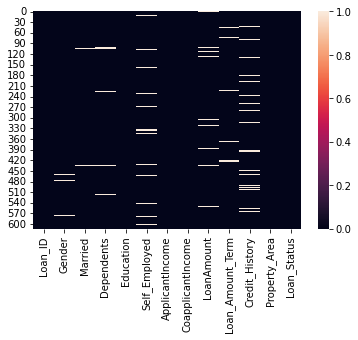

In [49]:
sns.heatmap(df.isnull())

We will fill in the null values in categorical columns using mode & in float columns with mean or median.

Filling Nan values of Gender

In [54]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [57]:
#filling missing gender values with mode.
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [59]:
#filling missing Married values with mode.
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [61]:
#filling missing Dependents values with mode.
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [63]:
#filling missing Self_Employed values with mode.
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [65]:
#finding the mean of Loan Amount

LoanAmount_mean=df['LoanAmount'].mean()
LoanAmount_mean

146.41216216216216

In [66]:
#filling the mean value in the null columns of LoanAmount
df['LoanAmount'].fillna(value= LoanAmount_mean, inplace=True)

In [68]:
#finding the mean of Loan_Amount_Term

Loan_Amount_Term_mean=df['Loan_Amount_Term'].mean()
Loan_Amount_Term_mean

342.0

In [69]:
#filling the mean value in the null columns of LoanAmount
df['Loan_Amount_Term'].fillna(value=Loan_Amount_Term_mean, inplace=True)

In [71]:
#finding the mean of Credit_History

Credit_History_mean=df['Credit_History'].mean()
Credit_History_mean

0.8421985815602837

In [72]:
#filling the mean value in the null columns of Credit History
df['Credit_History'].fillna(value=Credit_History_mean, inplace=True)

In [74]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

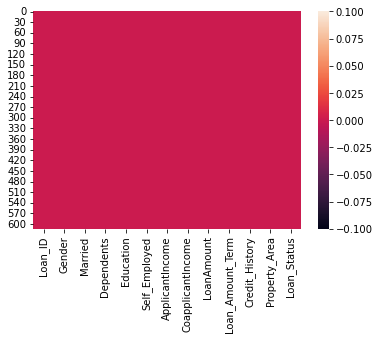

In [76]:
sns.heatmap(df.isnull())

All null values in the dataset have been updated.

 Encoding

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

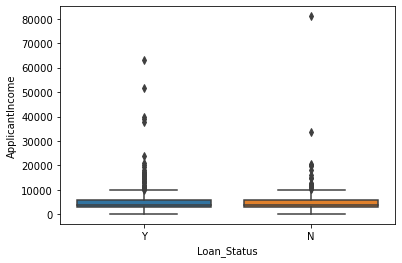

In [84]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status', data=df)

Observation: Most of the loan applicants income is between 10,000-20,000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

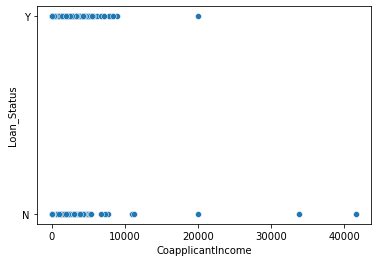

In [86]:
sns.scatterplot(x= 'CoapplicantIncome',y='Loan_Status', data=df)

Observation:Most of the Coapplicant Income is between 0-10000.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

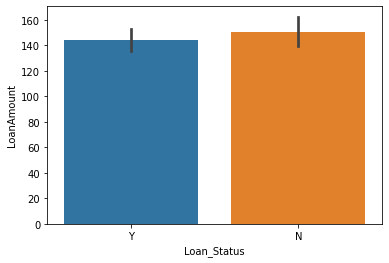

In [87]:
sns.barplot(x='Loan_Status', y='LoanAmount',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Gender'>

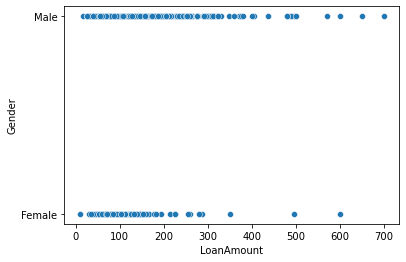

In [94]:
sns.scatterplot(x='LoanAmount',y='Gender', data =df)

Observation: Males were given a higher loan amount than females.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Gender'>

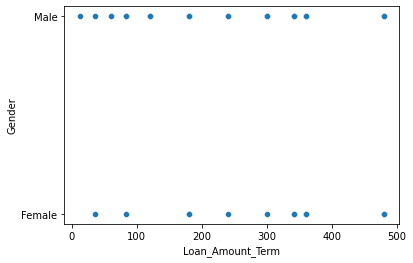

In [96]:
sns.scatterplot(y='Gender', x='Loan_Amount_Term', data = df)

Encoding

We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
Here we shall adopt Ordinal & Label Encoder to transform the all Non-numerical column into Numerical Data!

In [103]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [105]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [104]:
oe=OrdinalEncoder()
le=LabelEncoder()

In [108]:
df['Loan_ID']=le.fit_transform(df['Loan_ID'].values.reshape(-1,1))
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed']=oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area']=oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Loan_Status']=oe.fit_transform(df['Loan_Status'].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


Observations on Encoding
From the above its clear that all Non-numerical data have been converted(encoded) to Numerical Data.

In [109]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0
613,613,0.0,0.0,0.0,0.0,1.0,4583,0.0,133.0,360.0,0.0,1.0,0.0


In [110]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0


In [113]:
df.dtypes

Loan_ID                int64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Normal Distribution Check(Univariate Analysis)

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

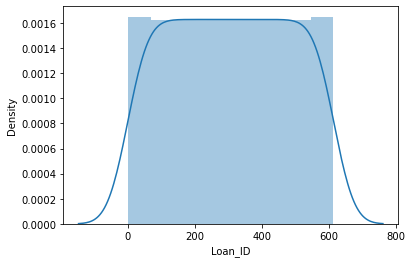

In [114]:
sns.distplot(df['Loan_ID'],kde=True)

<AxesSubplot:xlabel='Gender', ylabel='Density'>

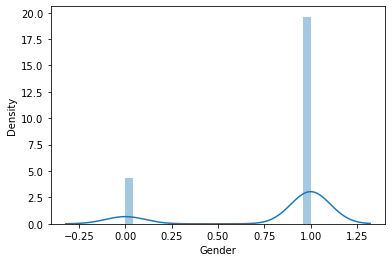

In [116]:
sns.distplot(df['Gender'],kde=True)

<AxesSubplot:xlabel='Married', ylabel='Density'>

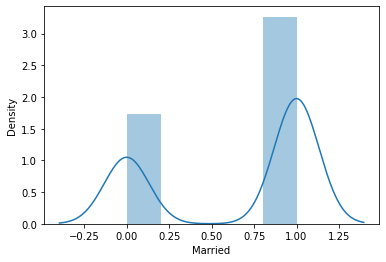

In [117]:
sns.distplot(df['Married'],kde=True)

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

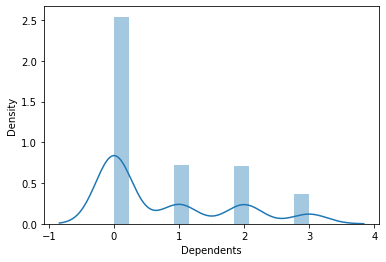

In [118]:
sns.distplot(df['Dependents'],kde=True)

<AxesSubplot:xlabel='Education', ylabel='Density'>

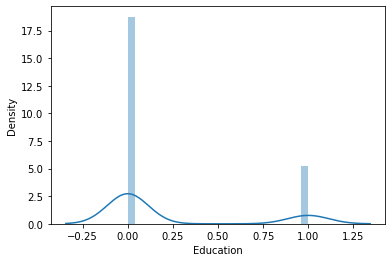

In [119]:
sns.distplot(df['Education'],kde=True)

<AxesSubplot:xlabel='Education', ylabel='Density'>

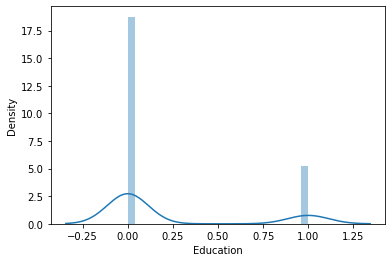

In [120]:
sns.distplot(df['Education'],kde=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

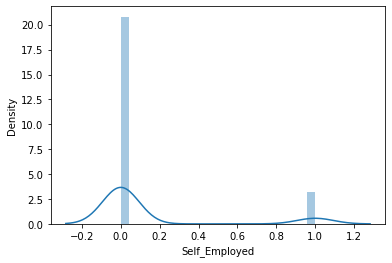

In [121]:
sns.distplot(df['Self_Employed'],kde=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

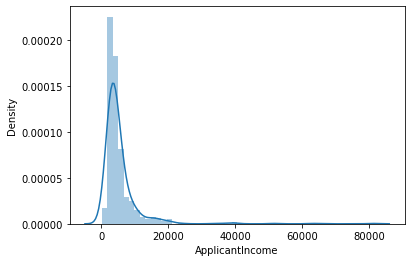

In [122]:
sns.distplot(df['ApplicantIncome'],kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

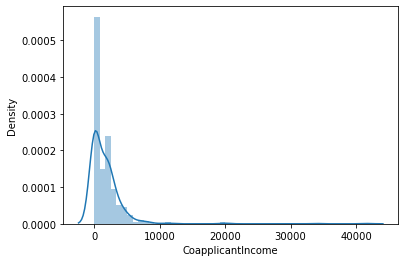

In [123]:
sns.distplot(df['CoapplicantIncome'],kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

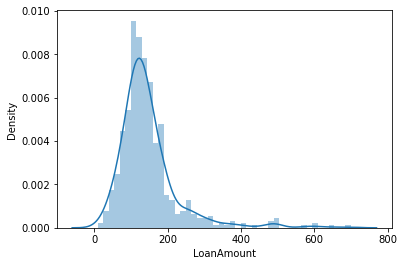

In [124]:
sns.distplot(df['LoanAmount'],kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

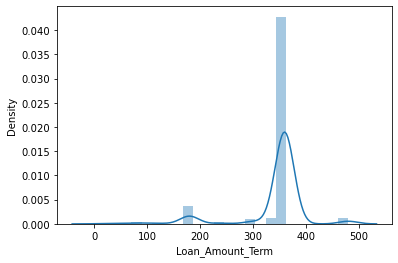

In [125]:
sns.distplot(df['Loan_Amount_Term'],kde=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

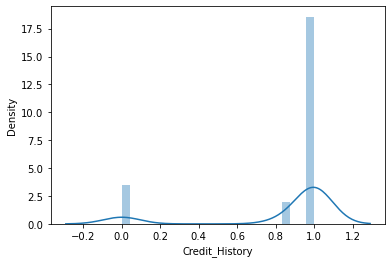

In [126]:
sns.distplot(df['Credit_History'],kde=True)

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

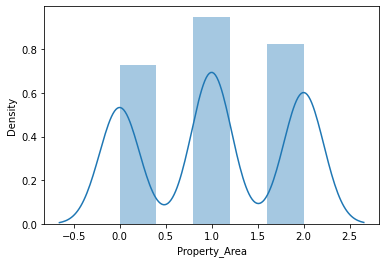

In [127]:
sns.distplot(df['Property_Area'],kde=True)

Observations on Normal Distribution Check

From the above density plot:

We can see that All the features do not obey a normal distribution.

The normal distribution of these features; 'Loan_ID', 'Gender', 'Married' 'Dependents', 'Education','Self_Employed','Property_Area ' has no contribution to our Model Building since they are categorical data

The normal distribution of the Loan_Status columns also has no contribution to our Model Building since its the Target variable

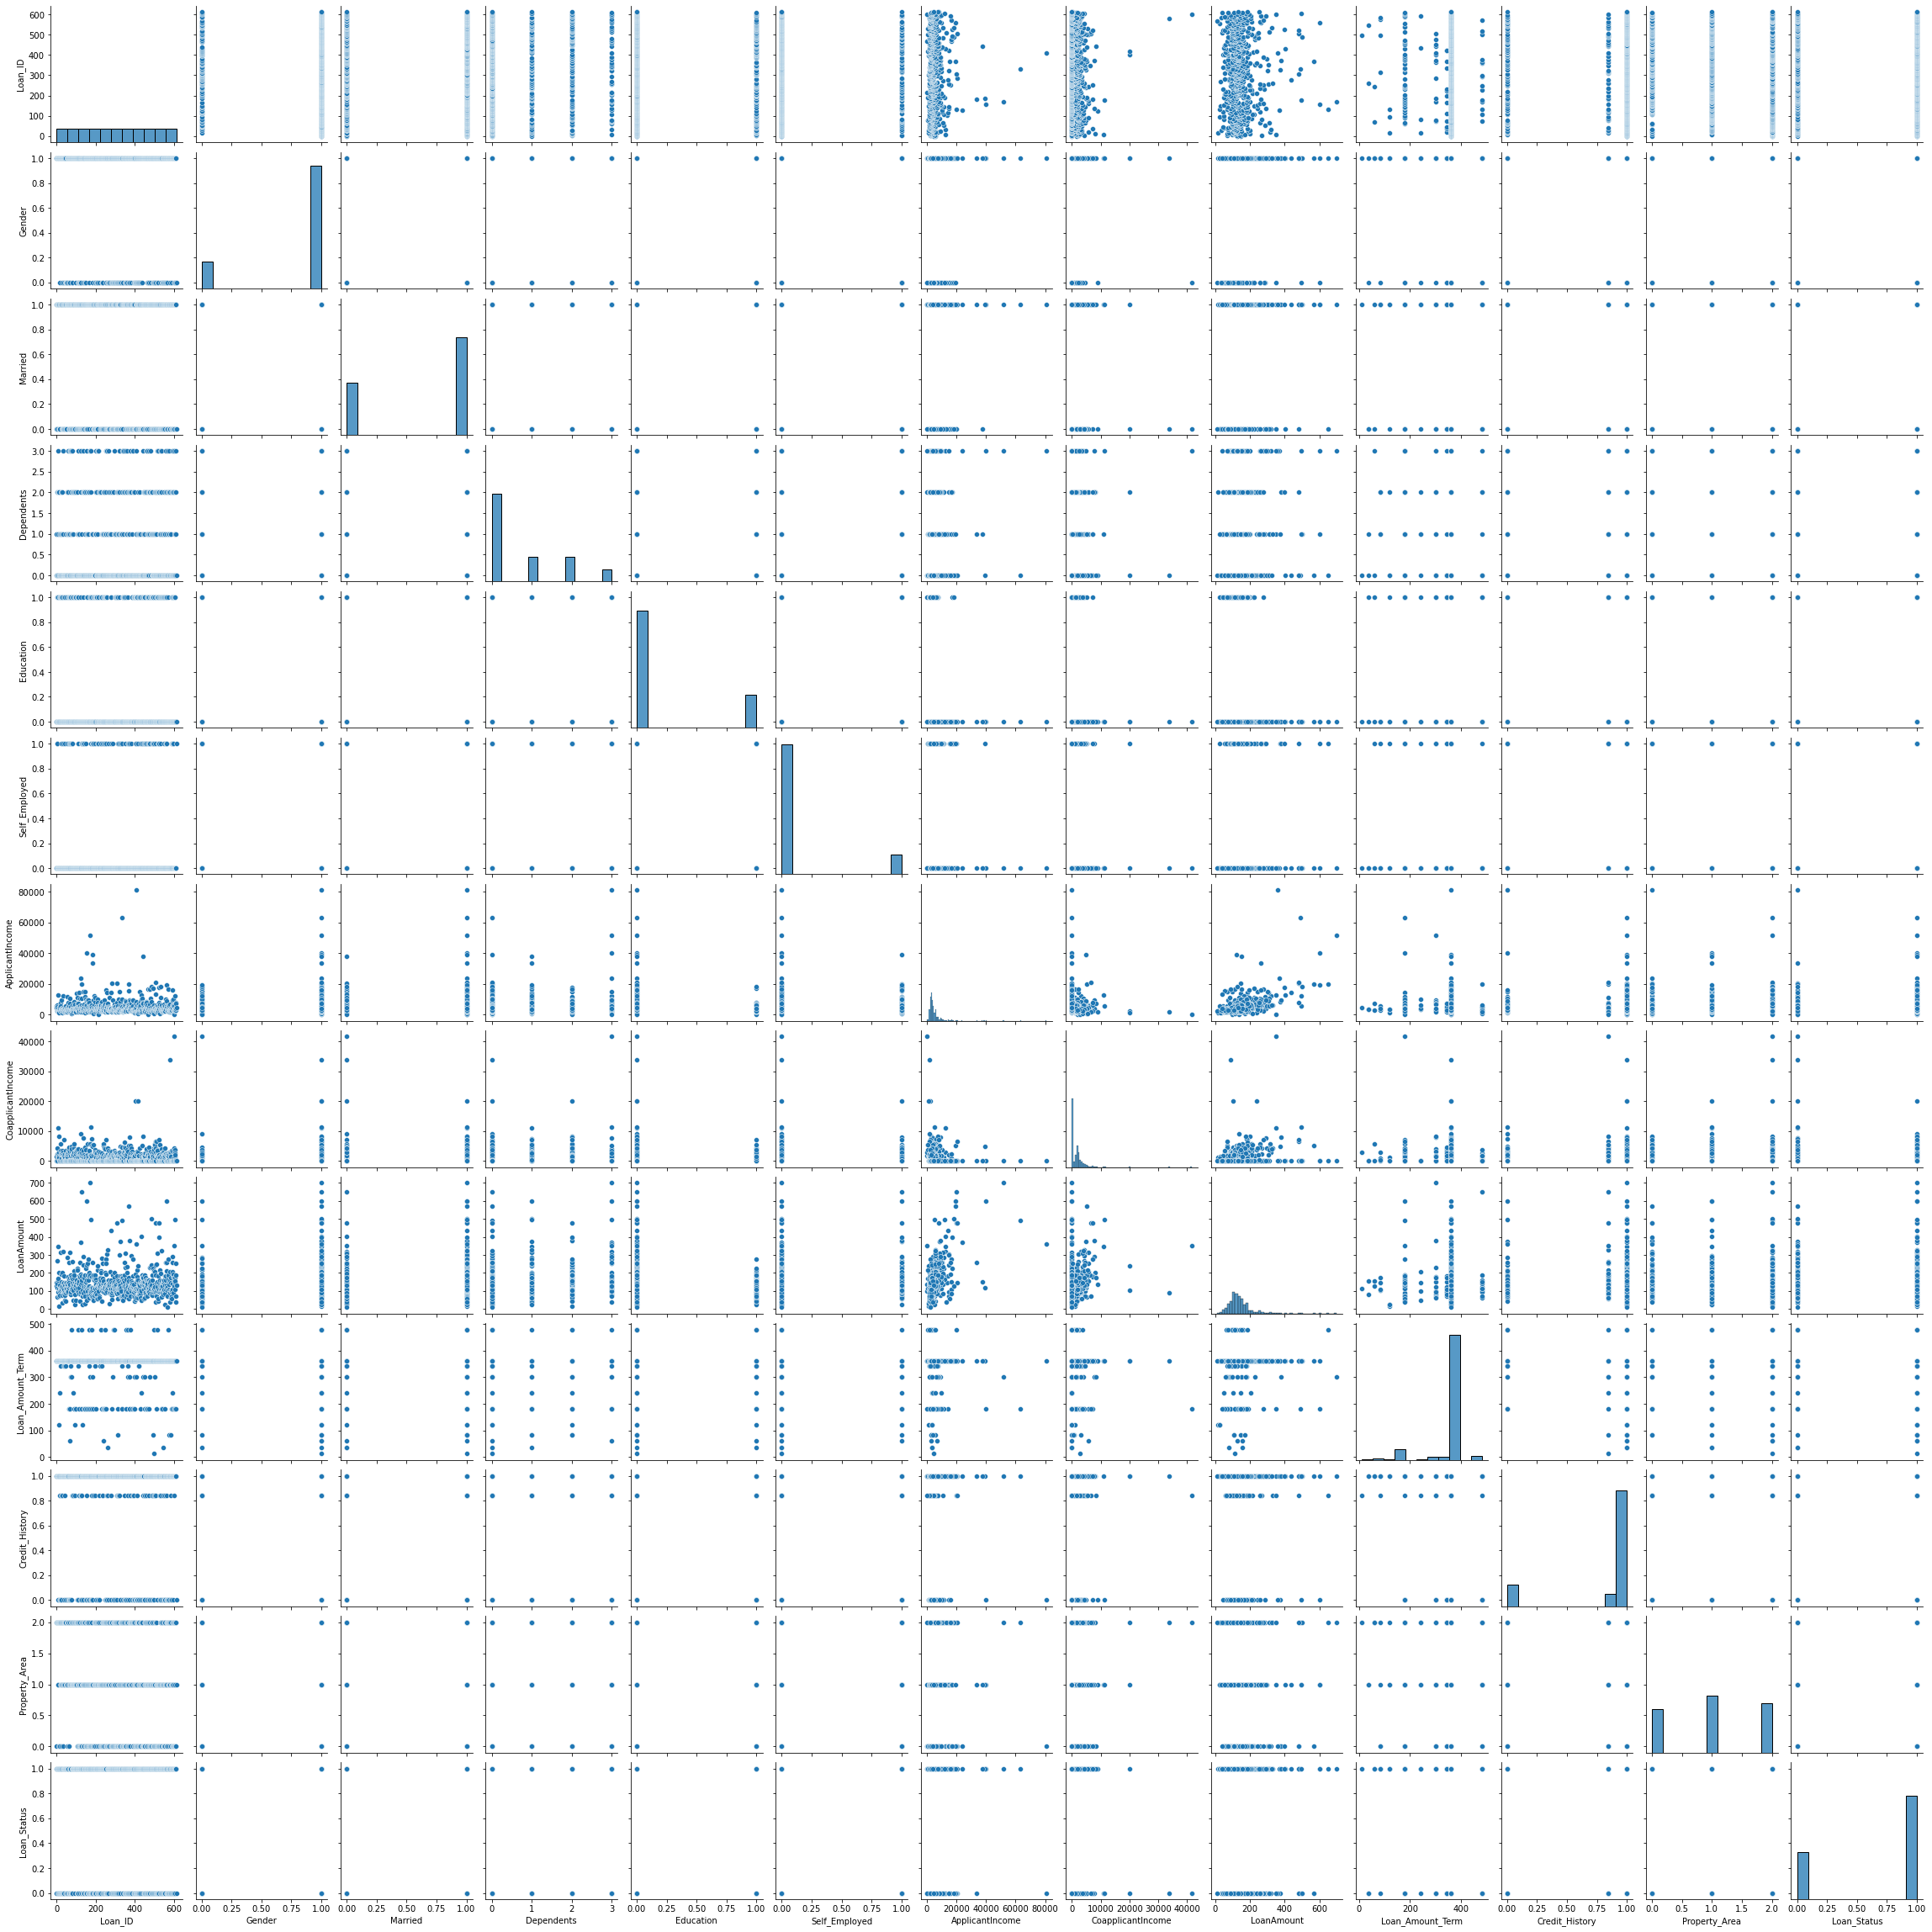

In [129]:
sns.pairplot(df)

Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
Collinearity Between Feature and Label
Multicolinearity between features
Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [131]:
#checking for general correlation
df.corr().T

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


In [132]:
#checking for correlation between each feature and Label
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

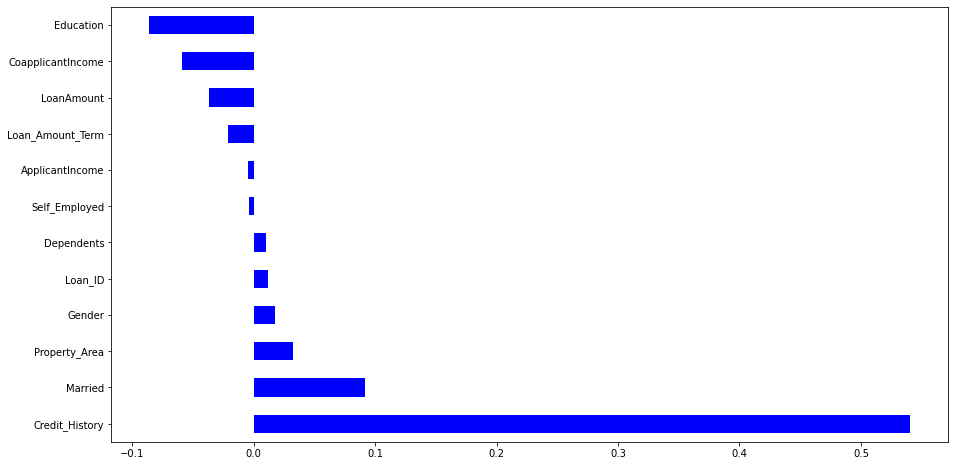

In [134]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='barh', color='b')
plt.show()

Observation: Credit History has the maximum positive relation with Loan Status.

Multicollinearity Check

<AxesSubplot:>

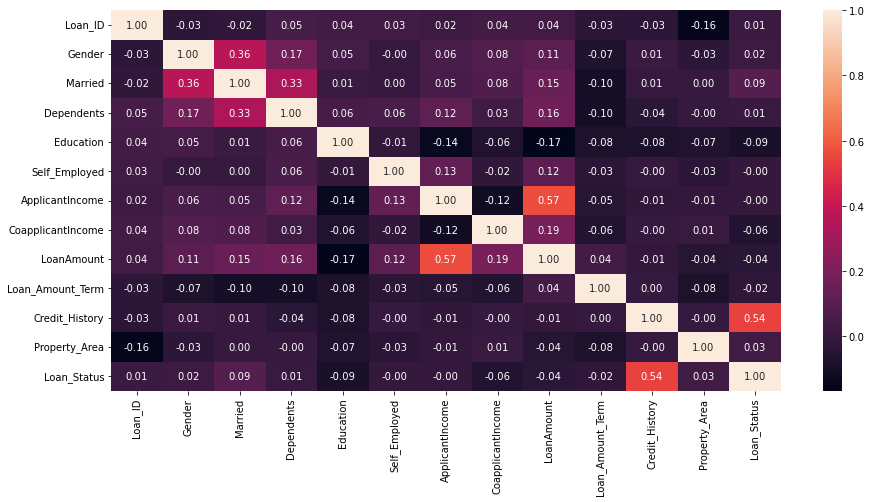

In [135]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

Observation:
    
    -Married & Gender have 0.36 corelation.
    -Dependednts & Married have 0.33 contribution.
    -Applicant Income 7 Loan Amount have a 0.57 correlation.
    -Credit History has a 0.54 positive contribution to Loan_Status.
    -Applicant Income & Self Employed have no contribution to Loan_Status.
    -Education & Married have  0.09 contriution to Loan-Status.
    
    
    But we will reconfrim all these in the  further steps by finding the Variance Inflation Factor(VIF)

NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them.

Outlier Check

Loan_ID                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Gender                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Self_Employed        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
LoanAmount              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Loan_Status                AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

<Figure size 2520x1080 with 0 Axes>

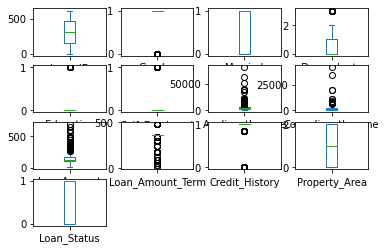

In [141]:
plt.figure(figsize=(35,15))

df.plot(kind='box',subplots= True, layout=(4,4))

Checking the outliers for numerical columns

<AxesSubplot:xlabel='ApplicantIncome'>

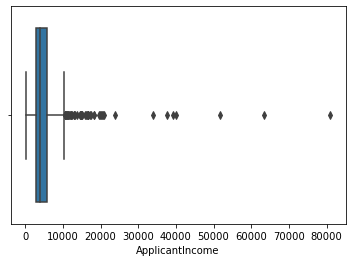

In [143]:
sns.boxplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

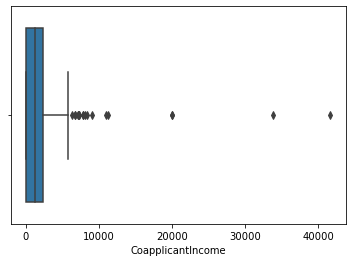

In [144]:
sns.boxplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

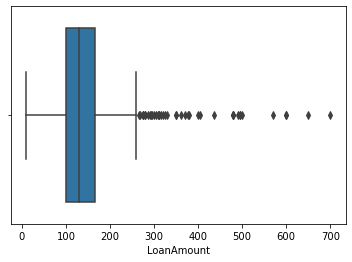

In [145]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

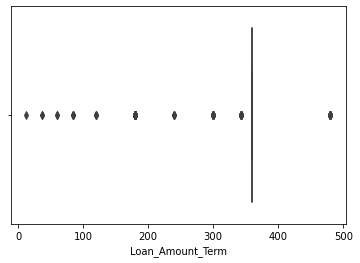

In [146]:
sns.boxplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History'>

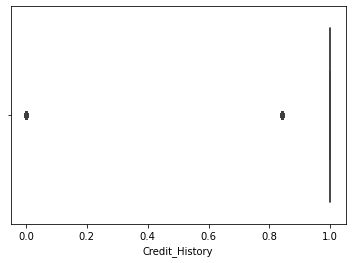

In [147]:
sns.boxplot(df['Credit_History'])

In [149]:
#Checking for skewness in each independent variable.
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

DATA PREPROCESSING

Removal of Duplicates and Unwanted Column

In [150]:
#Recheking shape of original data
df.shape

(614, 13)

In [151]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(614, 13)

Observation: No duplicate values in teh dataset.

Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [158]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [159]:
ss=StandardScaler()

In [160]:
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [161]:
print(x.shape)
print(y.shape)

(614, 12)
(614,)


In [162]:
scalar=StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.72923217,  0.47234264, -1.37208932, ...,  0.27985054,
         0.45164045,  1.22329839],
       [-1.7235903 ,  0.47234264,  0.72881553, ...,  0.27985054,
         0.45164045, -1.31851281],
       [-1.71794844,  0.47234264,  0.72881553, ...,  0.27985054,
         0.45164045,  1.22329839],
       ...,
       [ 1.71794844,  0.47234264,  0.72881553, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 1.7235903 ,  0.47234264,  0.72881553, ...,  0.27985054,
         0.45164045,  1.22329839],
       [ 1.72923217, -2.11710719, -1.37208932, ...,  0.27985054,
        -2.41044061, -0.04760721]])

In [163]:
x_scaled.shape

(614, 12)

In [164]:
#creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [165]:
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [166]:
vif['Features'] = x.columns
vif

,vif,Features
0,1.036309,Loan_ID
1,1.171772,Gender
2,1.282393,Married
3,1.167226,Dependents
4,1.065315,Education
5,1.024208,Self_Employed
6,1.630911,ApplicantIncome
7,1.142584,CoapplicantIncome
8,1.710861,LoanAmount
9,1.050963,Loan_Amount_Term


From the above vif dataframe,we are setting a vif threshold of 2, meaning any feature with Variance Inflation Factor greater than 2 is assumed to have a multicollinearity problem. it is not standard. 

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST.

Removal of Outliers

In [168]:
from scipy.stats import zscore

In [169]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [170]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(614, 13)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. 

In [171]:
#index number
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

In [172]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#initial dataset with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (614, 13)
New DataFrame (577, 13)
total_dropped_rows 37


In [173]:
#Checking the new dataframe with non-outliers
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [174]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,609,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
573,610,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
574,611,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
575,612,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [175]:
#dropping the index & Loan ID column.
df_new.drop('index', axis=1,inplace=True)
df_new.drop('Loan_ID', axis=1,inplace=True)
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
573,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
574,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
575,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


Transforming Data to Remove Skewness using Power transformation

In [177]:
#rechecking for skewness...
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [178]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We will apply Power Transformation for skewness

In [179]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method ='yeo-johnson')

In [180]:
#extracting the columns that are skewed
data=['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [181]:
#Now removing skewness by Power Transformation a nd updating dataset(bdmtrain_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [182]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.477137,0.0,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.515236,2.0,1.0
1,0.477137,1.0,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.515236,0.0,0.0
2,0.477137,1.0,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.515236,2.0,1.0
3,0.477137,1.0,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.515236,2.0,1.0
4,0.477137,0.0,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.515236,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,0.0,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142609,0.515236,0.0,1.0
573,0.477137,1.0,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559206,0.515236,0.0,1.0
574,0.477137,1.0,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142609,0.515236,2.0,1.0
575,0.477137,1.0,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142609,0.515236,2.0,1.0


In [183]:
#rechecking for skewness
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [184]:
x=df_new.iloc[:,0:-1]
x.shape

(577, 11)

In [185]:
y=df_new.iloc[:,-1]
y.shape

(577,)

In [186]:
#transforming dataset into a standard normal distribution
sc=StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.22747207],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.30652215],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.22747207],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.22747207],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746, -0.03952504]])

In [187]:
#reconfirming that mean is 0
print(x_scaled.mean())
print(x_scaled.std())

3.0786080405550266e-18
1.0


MODEL BUILDING

Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [189]:
lr=LogisticRegression()

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25)

In [191]:
x_train.shape

(432, 11)

In [192]:
x_test.shape

(145, 11)

In [193]:
y_test.shape

(145,)

In [194]:
y_train.shape

(432,)

In [195]:
#now we need to train the x and y data

lr.fit(x_train,y_train)

LogisticRegression()

In [196]:
pred=lr.predict(x_test)
pred

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [197]:
acc_lr=round(accuracy_score(y_test,pred),2)
acc_lr

0.78

In [198]:
confusion_matrix(y_test,pred)

array([[20, 22],
       [10, 93]], dtype=int64)

<AxesSubplot:>

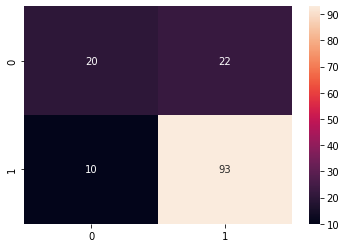

In [199]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [200]:
cl_report=classification_report(y_test,pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       0.67      0.48      0.56        42
         1.0       0.81      0.90      0.85       103

    accuracy                           0.78       145
   macro avg       0.74      0.69      0.70       145
weighted avg       0.77      0.78      0.77       145



Checking for overfitting in Logistic Regression model.

Cross Validation of Logistic Regression

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
cv_scr=round(scr.mean(),2)
print(round(scr.std()),2)
print("The cv score for Linear Regression:",cv_scr)

[0.78448276 0.77586207 0.75652174 0.83478261 0.80869565]
0 2
The cv score for Linear Regression: 0.79


Decision Tree Classifier

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
dtc=DecisionTreeClassifier()

In [205]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [206]:
pred=dtc.predict(x_test)
pred

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [207]:
acc_dtc=round(accuracy_score(y_test,pred),2)
acc_dtc

0.72

In [208]:
confusion_matrix(y_test,pred)

array([[18, 24],
       [17, 86]], dtype=int64)

<AxesSubplot:>

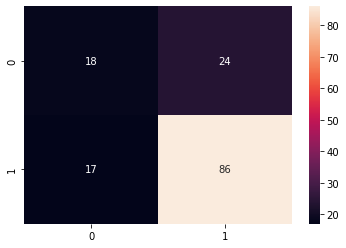

In [209]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [211]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.51      0.43      0.47        42
         1.0       0.78      0.83      0.81       103

    accuracy                           0.72       145
   macro avg       0.65      0.63      0.64       145
weighted avg       0.70      0.72      0.71       145



Cross Validation of Decision Tree Classifier

In [212]:
dtc_scr=cross_val_score(dtc,x,y,cv=5)
print(dtc_scr)
dtc_cv_scr=round(dtc_scr.mean(),2)
print(round(dtc_scr.std()),2)
print("The cv score for Decision Tree:",dtc_cv_scr)

[0.72413793 0.64655172 0.73913043 0.68695652 0.71304348]
0 2
The cv score for Decision Tree: 0.7


Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
rf=RandomForestClassifier()

In [216]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [217]:
pred=rf.predict(x_test)
pred

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [218]:
acc_rf=round(accuracy_score(y_test,pred),2)
acc_rf

0.79

In [219]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[19, 23],
       [ 8, 95]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.70      0.45      0.55        42
         1.0       0.81      0.92      0.86       103

    accuracy                           0.79       145
   macro avg       0.75      0.69      0.71       145
weighted avg       0.78      0.79      0.77       145



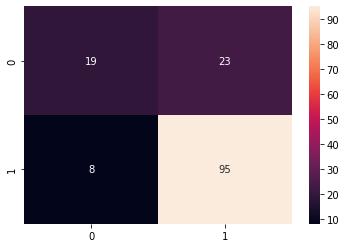

In [220]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Random Forest

In [221]:
rf_scr=cross_val_score(rf,x,y,cv=5)
print(rf_scr)
rf_cv_scr=round(rf_scr.mean(),2)
print(round(rf_scr.std()),2)
print("The cv score for Random Forest:",rf_cv_scr)

[0.80172414 0.77586207 0.77391304 0.84347826 0.82608696]
0 2
The cv score for Random Forest: 0.8


SVC 

In [222]:
from sklearn.svm import SVC

In [223]:
svc=SVC()

In [224]:
svc.fit(x_train,y_train)

SVC()

In [225]:
pred=svc.predict(x_test)
pred

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [226]:
acc_svc=round(accuracy_score(y_test,pred),2)
acc_svc

0.81

In [227]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[18, 24],
       [ 4, 99]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.82      0.43      0.56        42
         1.0       0.80      0.96      0.88       103

    accuracy                           0.81       145
   macro avg       0.81      0.69      0.72       145
weighted avg       0.81      0.81      0.79       145



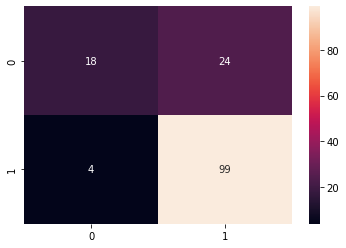

In [228]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of SVC

In [229]:
svc_scr=cross_val_score(svc,x,y,cv=5)
print(svc_scr)
svc_cv_scr=round(svc_scr.mean(),2)
print(round(svc_scr.std()),2)
print("The cv score for SVC:",svc_cv_scr)

[0.80172414 0.77586207 0.79130435 0.84347826 0.8173913 ]
0 2
The cv score for SVC: 0.81


Gaussian Naive Bayes

In [230]:
from sklearn.naive_bayes import GaussianNB

In [231]:
gb=GaussianNB()

In [232]:
gb.fit(x_train,y_train)

GaussianNB()

In [233]:
pred=gb.predict(x_test)
pred

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [234]:
acc_gb=round(accuracy_score(y_test,pred),2)
acc_gb

0.77

In [235]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[22, 20],
       [14, 89]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56        42
         1.0       0.82      0.86      0.84       103

    accuracy                           0.77       145
   macro avg       0.71      0.69      0.70       145
weighted avg       0.76      0.77      0.76       145



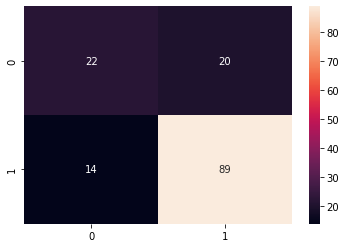

In [236]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Gaussian Naive Bayes

In [237]:
gb_scr=cross_val_score(gb,x,y,cv=5)
print(gb_scr)
gb_cv_scr=round(gb_scr.mean(),2)
print(round(gb_scr.std()),2)
print("The cv score for Gaussian Naive Bayes:",gb_cv_scr)

[0.79310345 0.74137931 0.74782609 0.80869565 0.7826087 ]
0 2
The cv score for Gaussian Naive Bayes: 0.77


In [238]:
#constructing a dataframe of tehmodels used

Models=pd.DataFrame({'Ml_Models':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier', 'SVC','Gausian Naive Bayes'], 'Accuracy_Score':[acc_lr,acc_dtc,acc_rf,acc_svc,acc_gb], 'Cross_Validation_Score':[cv_scr,dtc_cv_scr,rf_cv_scr,svc_cv_scr,gb_cv_scr]})
Models

,Ml_Models,Accuracy_Score,Cross_Validation_Score
0,Logistic Regression,0.78,0.79
1,Decision Tree Classifier,0.72,0.70
2,Random Forest Classifier,0.79,0.80
3,SVC,0.81,0.81
4,Gausian Naive Bayes,0.77,0.77


We will be taking SVC as the best model as the accuracy score & Cross validation score is the same for this model.

Hyper Parameter tunning

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
svc=SVC()

In [244]:
parameters={'kernel':('linear','rbf'), 'C':[1,10]}

In [247]:
GSV=GridSearchCV(svc,parameters,cv=5)

In [248]:
GSV.fit(x_train,y_train)
GSV.best_params_

{'C': 1, 'kernel': 'linear'}

In [249]:
GSV.best_estimator_

SVC(C=1, kernel='linear')

In [250]:
GCV_pred=GSV.best_estimator_.predict(x_test)#predicting with the best parameter
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.8206896551724138

ROC AUC plot

In [251]:
from sklearn.metrics import plot_roc_curve

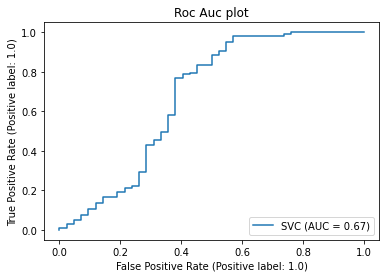

In [252]:
plot_roc_curve(GSV.best_estimator_,x_test,y_test)
plt.title("Roc Auc plot")
plt.show()

Model Saving

In [253]:
import pickle

In [254]:
filename='ML_Loan_Application'
pickle.dump(svc,open(filename,'wb'))